En utilisant le SVM effectuez une prédiction des survivants du titanic.

In [42]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [28]:
df = pd.read_csv("./titanic.csv", index_col="PassengerId")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [52]:
df["Survived"].value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

In [30]:
to_remove = [ "Name", "Ticket", "Cabin"]

In [31]:
categorical_features = ['Pclass', 'Sex', 'Embarked' ] # Survived est ignoré car déja bon
numerical_features = [ 'Age', 'Fare',  'SibSp', 'Parch' ]

In [32]:
df.drop(columns=to_remove, inplace=True)

In [33]:
df.dropna(inplace=True)

In [34]:
scaler = StandardScaler()
scaler.fit(df[numerical_features])

StandardScaler()

In [35]:
scaler.set_output(transform="pandas")
df_num =  scaler.transform(df[numerical_features])

In [36]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
ohe.set_output(transform="pandas")
ohe.fit(df[categorical_features])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [37]:
df_cat = ohe.transform(df[categorical_features])

In [40]:
X = pd.concat([df_cat, df_num], axis=1)
y = df["Survived"]

In [39]:
X

Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  Embarked_C  \
PassengerId                                                                   
1                 0.0       0.0       1.0         0.0       1.0         0.0   
2                 1.0       0.0       0.0         1.0       0.0         1.0   
3                 0.0       0.0       1.0         1.0       0.0         0.0   
4                 1.0       0.0       0.0         1.0       0.0         0.0   
5                 0.0       0.0       1.0         0.0       1.0         0.0   
...               ...       ...       ...         ...       ...         ...   
886               0.0       0.0       1.0         1.0       0.0         0.0   
887               0.0       1.0       0.0         0.0       1.0         0.0   
888               1.0       0.0       0.0         1.0       0.0         0.0   
890               1.0       0.0       0.0         0.0       1.0         1.0   
891               0.0       0.0       1.0         0.0       1.0         0.0   

             Embarked_Q  Embarked_S       Age      Fare     SibSp     Parch  
PassengerId                                                                  
1                   0.0         1.0 -0.527669 -0.516380  0.522511 -0.506787  
2                   0.0         0.0  0.577094  0.694046  0.522511 -0.506787  
3                   0.0         1.0 -0.251478 -0.503620 -0.552714 -0.506787  
4                   0.0         1.0  0.369951  0.350326  0.522511 -0.506787  
5                   0.0         1.0  0.369951 -0.501257 -0.552714 -0.506787  
...                 ...         ...       ...       ...       ...       ...  
886                 1.0         0.0  0.646142 -0.102875 -0.552714  5.350885  
887                 0.0         1.0 -0.182430 -0.407687 -0.552714 -0.506787  
888                 0.0         1.0 -0.734812 -0.086335 -0.552714 -0.506787  
890                 0.0         0.0 -0.251478 -0.086335 -0.552714 -0.506787  
891                 1.0         0.0  0.162808 -0.506928 -0.552714 -0.506787  

[712 rows x 12 columns]

In [41]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
886    0
887    0
888    1
890    1
891    0
Name: Survived, Length: 712, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [45]:
X_test.shape

(143, 12)

Modelisation avec SVM

In [59]:
svm = SVC(kernel="linear")

In [60]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [61]:
y_pred = svm.predict(X_test)

à remplacer

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [69]:
(y_pred == y_test).sum()/len(y_test) # accuracy

np.float64(0.7482517482517482)

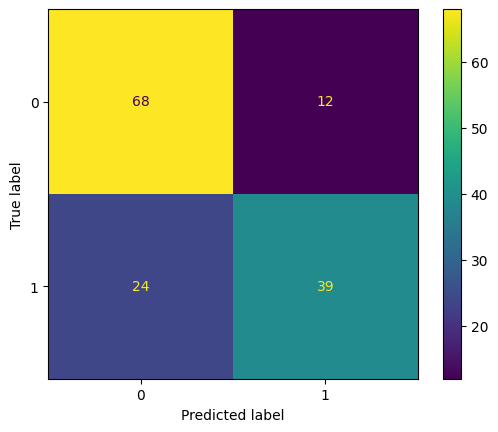

In [82]:
(tn, fp), (fn, tp) = confusion_matrix(y_test, y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
displ.plot()

In [71]:
accuracy_score(y_true=y_test, y_pred=y_pred),\
precision_score(y_true=y_test, y_pred=y_pred),\
recall_score(y_true=y_test, y_pred=y_pred),\
f1_score(y_true=y_test, y_pred=y_pred)

(0.7482517482517482,
 np.float64(0.7647058823529411),
 np.float64(0.6190476190476191),
 np.float64(0.6842105263157895))

In [ ]:
# # test visualisation
# # https://scikit-learn.org/1.5/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py
# import matplotlib.pyplot as plt
# import numpy as np

# w = svm.coef_[0]
# a = -w[0] / w[1]
# xx = np.linspace(-5, 5)
# yy = a * xx - (svm.intercept_[0]) / w[1]
# fignum = 1

# margin = 1 / np.sqrt(np.sum(svm.coef_**2))
# yy_down = yy - np.sqrt(1 + a**2) * margin
# yy_up = yy + np.sqrt(1 + a**2) * margin

# plt.figure(fignum, figsize=(4, 3))
# plt.clf()
# plt.plot(xx, yy, "k-")
# plt.plot(xx, yy_down, "k--")
# plt.plot(xx, yy_up, "k--")

# plt.scatter(
#     svm.support_vectors_[:, 0],
#     svm.support_vectors_[:, 1],
#     s=80,
#     facecolors="none",
#     zorder=10,
#     edgecolors="k",
# )
# plt.scatter(
#     X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.get_cmap("RdBu"), edgecolors="k"
# )


Recherche des hyperparamètres

In [83]:
svm = SVC()

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = {"kernel":["linear","poly", "rbf"], "C":[1,2,3], "probability":[True]}
grid_clf = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring="precision") #, scoring=["f1", "accuracy"], refit=False)

In [115]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3], 'kernel': ['linear', 'poly', 'rbf'],
                         'probability': [True]},
             scoring='precision')

In [116]:
grid_clf.cv_results_

{'mean_fit_time': array([0.04419255, 0.05085893, 0.04663758, 0.03834949, 0.12823639,
        0.12395101, 0.06656079, 0.05963688, 0.05599871]),
 'std_fit_time': array([0.01022934, 0.00994308, 0.01008642, 0.00966573, 0.10440794,
        0.09262663, 0.00576129, 0.00703609, 0.0110922 ]),
 'mean_score_time': array([0.00807447, 0.00629191, 0.00858736, 0.0056869 , 0.01233978,
        0.01572895, 0.00922651, 0.00668383, 0.00879612]),
 'std_score_time': array([0.00193981, 0.00115249, 0.00334491, 0.00098893, 0.01180429,
        0.01550582, 0.00066785, 0.00124488, 0.00300027]),
 'param_C': masked_array(data=[1, 1, 1, 2, 2, 2, 3, 3, 3],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=999999),
 'param_kernel': masked_array(data=['linear', 'poly', 'rbf', 'linear', 'poly', 'rbf',
                    'linear', 'poly', 'rbf'],
              mask=[False, False, False, False, False, False, False, False,
                    False],

In [117]:
grid_clf.best_params_

{'C': 3, 'kernel': 'rbf', 'probability': True}

In [118]:
grid_clf.best_estimator_.predict_proba(X_test)

array([[0.06289558, 0.93710442],
       [0.10244845, 0.89755155],
       [0.86194362, 0.13805638],
       [0.15691442, 0.84308558],
       [0.83954517, 0.16045483],
       [0.23730315, 0.76269685],
       [0.82779955, 0.17220045],
       [0.17250934, 0.82749066],
       [0.77575384, 0.22424616],
       [0.56787905, 0.43212095],
       [0.83029814, 0.16970186],
       [0.83468207, 0.16531793],
       [0.83443036, 0.16556964],
       [0.93654927, 0.06345073],
       [0.72415173, 0.27584827],
       [0.82867438, 0.17132562],
       [0.15783027, 0.84216973],
       [0.82799835, 0.17200165],
       [0.13282062, 0.86717938],
       [0.07355974, 0.92644026],
       [0.83443036, 0.16556964],
       [0.11599883, 0.88400117],
       [0.22210309, 0.77789691],
       [0.85172944, 0.14827056],
       [0.83233209, 0.16766791],
       [0.22452703, 0.77547297],
       [0.61794216, 0.38205784],
       [0.46912957, 0.53087043],
       [0.83067601, 0.16932399],
       [0.03899392, 0.96100608],
       [0.